<a href="https://colab.research.google.com/github/bozorgpanah/The-Explainable-Machine-Learning-Model-withPrivacy/blob/main/Paper1/Noise_Addition_USA_Housing_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Laplace-and-Exponential-mechanisms-for-privacy
#*******************************************************************************************************************************
"""Application of Laplace and Exponential mechanisms to add random noise to data for differential privacy. 
Plotting MSE vs. epsilon."""

'Application of Laplace and Exponential mechanisms to add random noise to data for differential privacy. \nPlotting MSE vs. epsilon.'

In [ ]:
#Uploading a dataset from local drive to colab
from google.colab import files
uploaded = files.upload()

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import io
import csv

##Reading dataset
df = pd.read_csv(io.BytesIO(uploaded['USA_Housing.csv'])) #Dataset's name == 
# Dataset is now stored in a Pandas Dataframe
df.info()


# now check for missing values in total bedrooms
df.isnull().sum()
# ------------------------------------------------------------------


Saving USA_Housing.csv to USA_Housing.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   79545.45857  4999 non-null   float64
 1   5.682861322  4999 non-null   float64
 2   7.009188143  4999 non-null   float64
 3   4.09         4999 non-null   float64
 4   23086.8005   4999 non-null   float64
 5   1059033.558  4999 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


79545.45857    0
5.682861322    0
7.009188143    0
4.09           0
23086.8005     0
1059033.558    0
dtype: int64

In [ ]:
# Implementing Laplace mechanism on USA_Housing dataset by adding Laplacian random noise
import sys
import csv
# Load USA_Housing dataset 
dataset = pd.read_csv(io.BytesIO(uploaded['USA_Housing.csv']), names=["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms", "Area Population", "Price"])
dataset.tail()

# Set parameters for Laplace function implementation
location = 0.0
scale = 4.0 # b
names=["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms", "Area Population", "Price"]

for i in names:
   # Gets random laplacian noise for all values
   Laplacian_noise = np.random.laplace(location, scale, 5000)
   Noise_ = Laplacian_noise + dataset[i]
   #print(Noise_)
   df[i] = Noise_
   #print(i)
df.to_csv("sample.csv", index=False)
files.download("sample.csv")

"""
# Generate noisy histogram
noisydata.plot(kind="bar",color = 'g')
"""

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'\n# Generate noisy histogram\nnoisydata.plot(kind="bar",color = \'g\')\n'

In [ ]:
#SHAP
!pip install shap #Install SHAP library

     |████████████████████████████████| 358kB 3.1MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491635 sha256=74b4d433da556d49da726da82471cbaa9861738582c9e0041c1297a31fb1b917
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
#Uploading a dataset from local drive to colab
from google.colab import files
uploaded = files.upload()

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import io

##Reading dataset
df = pd.read_csv(io.BytesIO(uploaded['MaskedDataset_USAHousing_Laplacian_noise_b=2.csv'])) #Dataset's name == USA_Housing.csv OR == centroids_csv (ProtectedDataset)k=3.csv 
# Dataset is now stored in a Pandas Dataframe
df.info()

# now check for missing values in total bedrooms
df.isnull().sum()
# ------------------------------------------------------------------



KeyError: ignored

In [ ]:
import math
##Feature Vector and Target Variable
X = df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']] #Feature Vector
y = df['Price'] #Target Variable

##Splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

"""
print(X_train,y_train)
print("####################################################################################################")
print(X_test,y_test)
"""
##Building the model with --> Random Forest Classifier
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, y_train)

##Generating Predictions
y_pred = model.predict(X_test)
print("Prediction: ", y_pred)

##Evaluating Performance
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)**(0.5)
print("mean_squared_error: ", mse)

rmse = math.sqrt(mse)
print('\n\nAccuracy for Random Forest:',100*max(0,rmse))

Prediction:  [1062848.43711128 1338384.8264627  1560065.26202299 ... 1443044.44986664
 1203619.37797009  972112.99625323]
mean_squared_error:  210238.2680012795


In [ ]:
##SHAP Explanation
#Force Plots
# import shap library
import shap 
from IPython.display import display

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation 
shap.initjs()
display(shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:]))


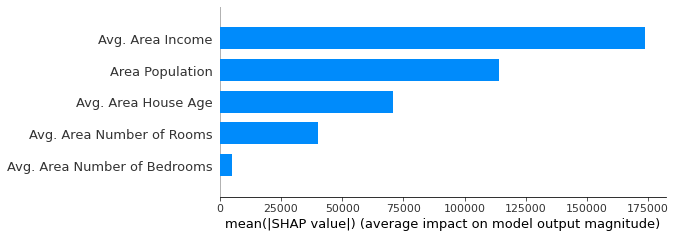

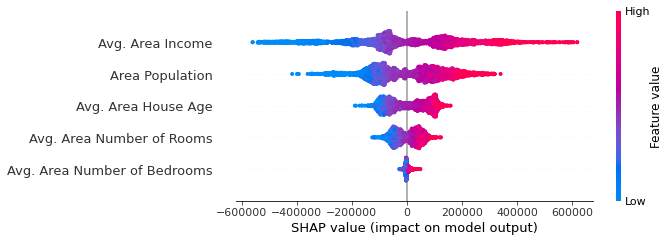

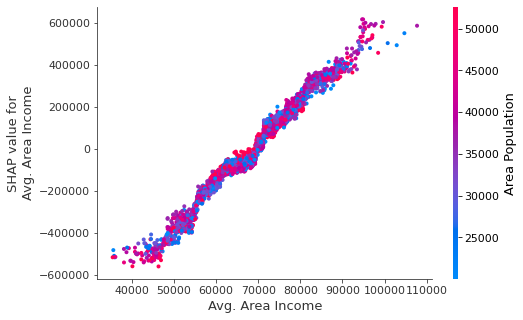

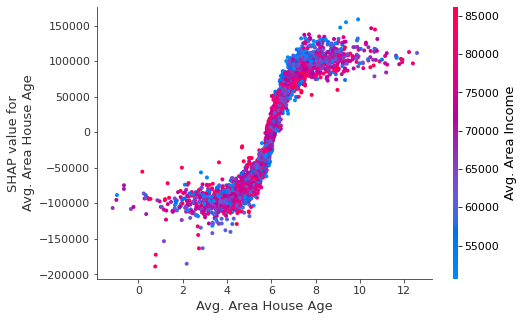

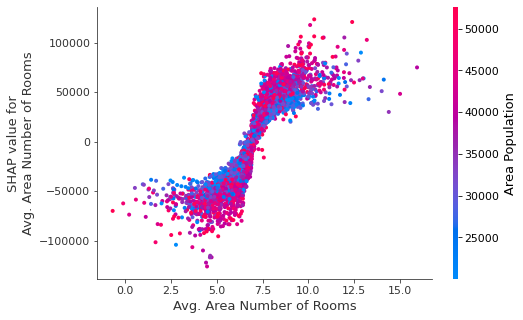

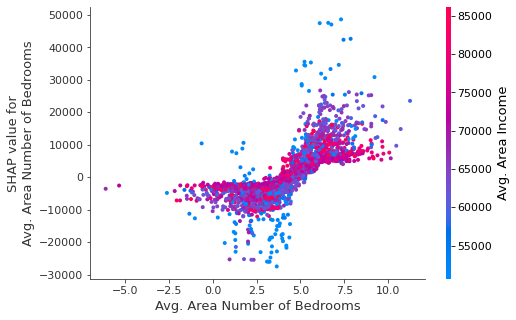

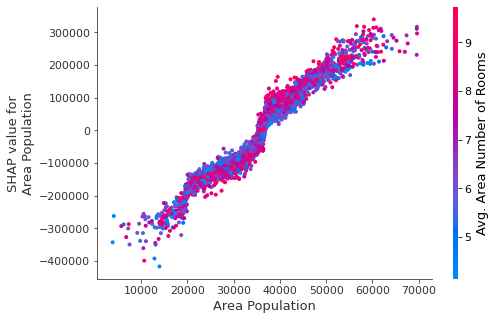

In [ ]:
shap.initjs()
# visualize the training set predictions
#shap.force_plot(explainer.expected_value, shap_values, X_train)

##SHAP Feature Importance
shap_values = shap.TreeExplainer(model).shap_values(X_train)

#x = shap_values.mean()
#print(x)
#print(shap_values)

shap.summary_plot(shap_values, X_train, plot_type="bar")

##SHAP Summary Plot
shap.summary_plot(shap_values, X_train)

##SHAP Dependence Plot

shap.dependence_plot('Avg. Area Income', shap_values, X_train)
shap.dependence_plot('Avg. Area House Age', shap_values, X_train)
shap.dependence_plot('Avg. Area Number of Rooms', shap_values, X_train)
shap.dependence_plot('Avg. Area Number of Bedrooms', shap_values, X_train)
shap.dependence_plot('Area Population', shap_values, X_train)


In [ ]:
###The below code is suitable to |ADDING NOISE from Exponential mechanism| 
###I can continue it in other papers

In [ ]:
""" Program to add noise generated from Exponential mechanism
    to Original USA_Housing dataset.
"""  
# Load the USA_Housing dataset
dataset = pd.read_csv(io.BytesIO(uploaded['USA_Housing.csv']), names=["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms", "Area Population", "Price"])

dataset.tail()
#print(dataset)

datacount = dataset["Avg. Area Income"].value_counts()

# Generate random noise from exponential function.
Exponential_noise = np.random.exponential(1)     # Keep max limit = 1

print ("Exponentially generated noise:", Exponential_noise)

"""Add random noise drawn from Exponential function to Original data count"""
noisydata = datacount + Exponential_noise

#save noisy dataset
dataset["Avg. Area Income"] = noisydata
#print(dataset)
dataset.to_csv ("MaskedDataset_Exponential_noise.csv")
files.download("MaskedDataset_Exponential_noise.csv")


#Plot histogram for Noisy data
noisydata.plot(kind="bar", color = 'r')

NameError: ignored

Average Mean Square Error is- 
0.09475009322020045


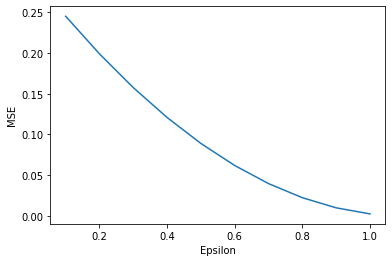

In [ ]:
# Program to compute Mean Squared Error(MSE) and show plot between Epsilon and MSE
# in Laplace Mechanism
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Load the USA_Housing dataset 
dataset =  pd.read_csv(io.BytesIO(uploaded['USA_Housing.csv']), names=["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"])
dataset.tail()

# Laplace function implementation, takes epsilon as an argument
def Laplacian_func(eps):     
 x = 0.01
 mu = 0                    # mean
 return ((eps/2.0) * np.exp(-abs(x - mu)*eps))
 
datacount = dataset["Country"].value_counts()    #Store actual data count
tmp = []
mselist = []
fig=plt.figure()

# Call laplace for all values of epsilon, calculate MSE for each case and plot.
noise = Laplacian_func(0.1)
noisydata = datacount + noise
mse = ((datacount- noisydata)**2).mean(axis=0)  
mselist.append(mse)
noise = Laplacian_func(0.2)
noisydata = datacount + noise
mse = ((datacount-noisydata)**2).mean(axis=0) 
mselist.append(mse)
noise = Laplacian_func(0.3)
noisydata = datacount + noise
mse = ((datacount-noisydata)**2).mean(axis=0)  
mselist.append(mse)
noise = Laplacian_func(0.4)
noisydata = datacount + noise
mse = ((datacount-noisydata)**2).mean(axis=0) 
mselist.append(mse)
noise = Laplacian_func(0.5)
noisydata = datacount + noise
mse = ((datacount-noisydata)**2).mean(axis=0)
mselist.append(mse)
noise = Laplacian_func(0.6)
noisydata = datacount + noise
mse = ((datacount-noisydata)**2).mean(axis=0)
mselist.append(mse)
noise = Laplacian_func(0.7)
noisydata = datacount + noise
mse = ((datacount-noisydata)**2).mean(axis=0)
mselist.append(mse)
noise = Laplacian_func(0.8)
noisydata = datacount + noise
mse = ((datacount-noisydata)**2).mean(axis=0)
mselist.append(mse)
noise = Laplacian_func(0.9)
noisydata = datacount + noise
mse = ((datacount-noisydata)**2).mean(axis=0)
mselist.append(mse)
noise = Laplacian_func(1.0)
noisydata = datacount + noise
mse = ((datacount-noisydata)**2).mean(axis=0)
mselist.append(mse)

for i in range(0,50):
  for j in list(mselist):
      tmp.append(j)      
print ("Average Mean Square Error is: ") 
print (np.average(tmp))   

epsval = [1.0] 
x = 1.0
for i in range(1,10):
   x -= 0.1
   epsval.append(x)   
ax = fig.add_subplot(111)
ax.plot(epsval,mselist)
plt.xlabel('Epsilon')
plt.ylabel('MSE')
plt.show()


In [ ]:
# Find sensitivity - New dataset
import pandas as pd

#Load both datasets - USA_Housing (actual) dataset and modified dataset                                 
Actual_dataset = pd.read_csv(io.BytesIO(uploaded['USA_Housing.csv']), names=["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"])      
Actual_dataset.tail()    

Neighbouring_dataset = pd.read_csv("adultnew.data.txt", names=["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],engine='python',sep=r'\s*,\s*',na_values="?")     
Neighbouring_dataset.tail()

#Count of USA_Housing dataset 
Actual_attribute = Actual_dataset["Country"].value_counts()

#Count of modified dataset
Modified__attribute = Neighbouring_dataset["Country"].value_counts() 

#Sensitivity between above datasets
Sensitivity = max(abs(Modified__attribute - Actual_attribute))
print ("Sensitivity of neighbouring databases is:", Sensitivity)
 


Most native country is:  United-States    0.895829
Name: Country, dtype: float64


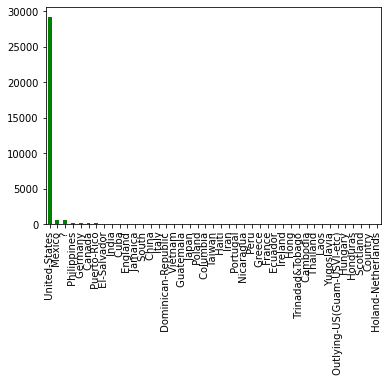

In [ ]:
""" Program to show implementation of Utility/Score function
    to release the name of Most native country """
    
# Import Libraries
import pandas as pd
import numpy as np

#Load the USA_Housing dataset
dataset = pd.read_csv(io.BytesIO(uploaded['USA_Housing.csv']), names=["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"])
dataset.tail()

"""Utility/Score function implementation"""
def Utility_function() :
   # Finds country with most number of entries 
   Utility = ((dataset["Country"].value_counts() / dataset.shape[0])).head(1)
   if dataset.dtypes["Country"] == np.object:
     dataset["Country"].value_counts().plot(kind="bar", color = 'g')
   return Utility  

#Call Utility function()
utility = Utility_function()  
print ("Most native country is:", utility)  
